# Topic 2 - Problems Solutions

### 1. Solutions from FPP - Chapter 3

### 2. # Topic 2 - Transformations and Decompositions

 

## Overview

 

This second topic covers a surprisingly important topics of transforming, adjusting and decomposing time series. These techniques are used everywhere to make modelling easier, from econometrics to outlier detection.

 

## Learning Materials

 

1. Read through [FPP3 Chapter 3](https://otexts.com/fpp3/decomposition.html).

2. For an alternative view, read [Decomposition](https://online.stat.psu.edu/stat510/lesson/5/5.1) and [Smoothing](https://online.stat.psu.edu/stat510/lesson/5/5.2) (don't worry about ARIMA just yet, though).

3. Watch [this course on Udemy](https://classroom.udacity.com/courses/ud980/); look at lessons 1 and 2 (a personal or EPAM account should be enough to access it).

 

## Tasks

 

### 1. Complete the [Chapter 3 Exercises](https://otexts.com/fpp3/decomposition-exercises.html). Use Pandas, [Statsmodels](https://www.statsmodels.org/dev/tsa.html), and your favorite plotting package.

   Use the [py-tsdata](https://pypi.org/project/py-tsdata/) package for data. Statsmodels has X12/X13 support, but if running on Colab use a different seasonal method.

In [37]:
import pandas as pd
# data usage
from tsdata.raw import available_data, load_data

# plotting
import seaborn as sns
from plotnine import (ggplot, geom_line, xlab, ylab, ggtitle, aes, theme, facet_wrap, facet_grid,
                      geom_point, geom_hline, geom_vline, xlim, ylim, theme_classic, theme_minimal,
                      element_blank, element_line, element_text, theme_538)

import matplotlib.font_manager as fm
fpath = "./xkcd.otf"

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
from statsmodels.base.transform import BoxCox
from statsmodels.tsa.seasonal import seasonal_decompose

import ipywidgets as widgets

In [4]:
# Consider the GDP information in global_economy. Plot the GDP per capita for each country over time. 
# Which country has the highest GDP per capita? 
# How has this changed over time?
global_economy_df = load_data("global_economy")
global_economy_df['GDP_Per_Capita'] = (global_economy_df
 .groupby('Country', group_keys=False)
 .apply(lambda df: df.GDP / df.Population)
)

last_year = global_economy_df.Year.max()

# get the top t10 countries by GDP PC
top_10_countries = global_economy_df[
    global_economy_df.Year == last_year
].sort_values(by='GDP_Per_Capita', ascending=False).Country[:10]


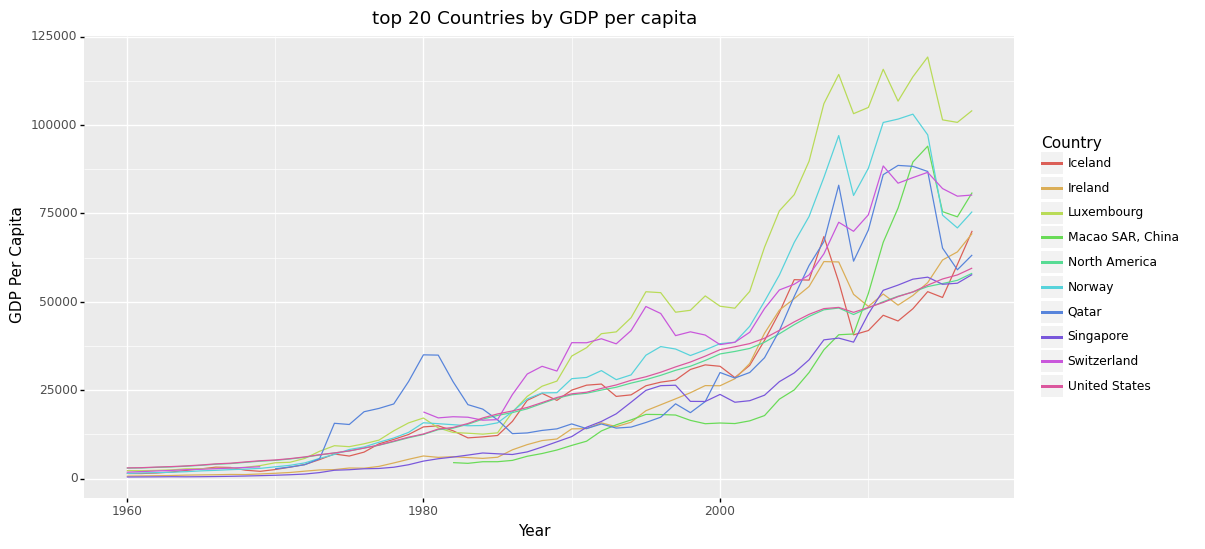

<ggplot: (8768140393644)>

In [12]:

(global_economy_df[
  global_economy_df.Country.isin(top_10_countries)
 ]
 .pipe(ggplot) +
    aes(x='Year', y='GDP_Per_Capita', color='Country') +
    geom_line() +
    theme(figure_size=(12, 6)) +
    ggtitle("top 20 Countries by GDP per capita") +
    ylab("GDP Per Capita")
)

In [15]:
# take top 20
global_economy_df[
  (global_economy_df.Country.isin(top_10_countries)) & (global_economy_df.Year == 2017)
 ].sort_values(by='GDP_Per_Capita').assign(GDP_Per_Capita = lambda df: df.GDP_Per_Capita.round(4))

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,GDP_Per_Capita
12143,Singapore,SGP,2017,3.239072e+11,3.618542,113.266146,149.082919,173.345205,5612253.0,57714.2966
10375,North America,NAC,2017,2.104998e+13,2.348806,NaN,NaN,NaN,362492702.0,58070.0661
14483,United States,USA,2017,1.939060e+13,2.273339,112.411557,NaN,NaN,325719178.0,59531.6620
11477,Qatar,QAT,2017,1.669286e+11,1.579850,115.857023,37.257003,51.042428,2639211.0,63249.4224
6605,Ireland,IRL,2017,3.337308e+11,7.802382,105.079586,87.878319,120.012529,4813608.0,69330.6902
6083,Iceland,ISL,2017,2.390929e+10,3.642227,121.956961,42.848779,46.963832,341284.0,70056.8734
10491,Norway,NOR,2017,3.988320e+11,1.918746,114.550719,33.051905,35.472423,5282223.0,75504.5663
13439,Switzerland,CHE,2017,6.788873e+11,1.086792,98.266862,53.927473,64.976735,8466017.0,80189.6969
8461,"Macao SAR, China",MAC,2017,5.036120e+10,9.096104,136.099091,32.009975,79.395298,622567.0,80892.8213
8403,Luxembourg,LUX,2017,6.240446e+10,2.297941,111.413231,193.969823,230.016430,599449.0,104103.0367


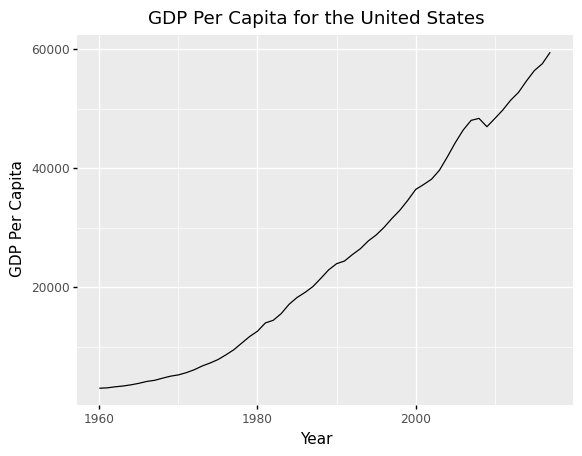

<ggplot: (8768111490085)>

In [16]:
# 2. For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect.

us_economy_df = global_economy_df[global_economy_df.Code == "USA"]
(us_economy_df
 .assign(GDP_Per_Capita = lambda df: df.GDP / df.Population)
 .pipe(ggplot) +
    aes(x='Year', y='GDP_Per_Capita') +
    geom_line() +
    ylab("GDP Per Capita") +
    ggtitle("GDP Per Capita for the United States")
)

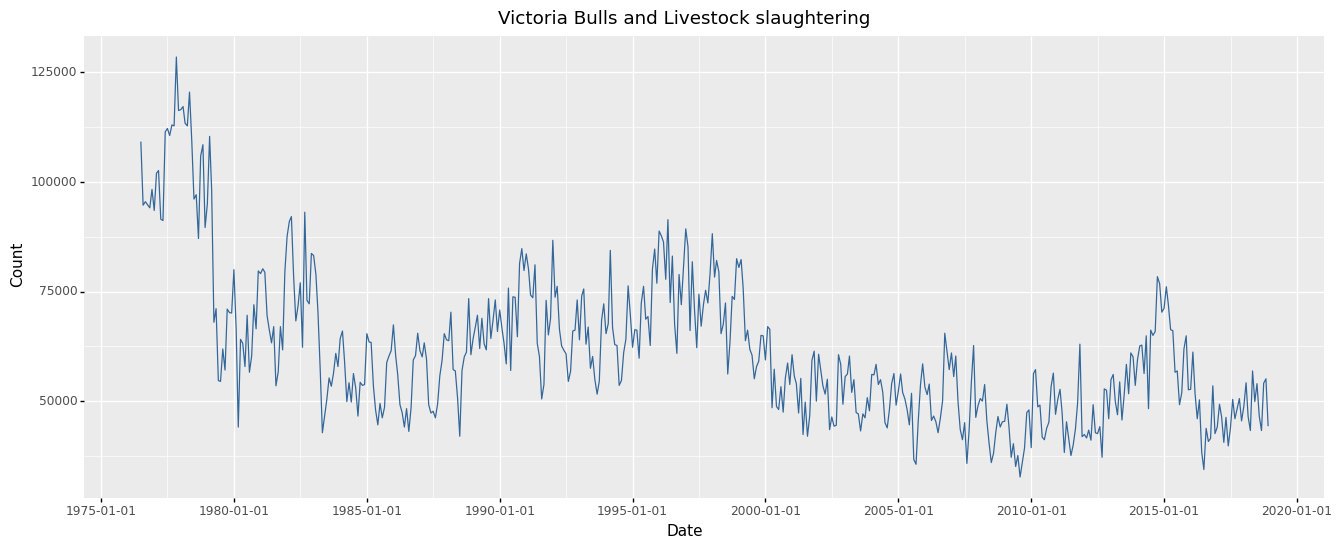

<ggplot: (8768111492166)>

In [17]:
aus_livestock_df = load_data("aus_livestock").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year,
    Month=lambda df: df.Date.dt.month
)

bulls_aus_livestock_df = aus_livestock_df[aus_livestock_df.Animal == "Bulls, bullocks and steers"]
victoria_bulls_df = bulls_aus_livestock_df[bulls_aus_livestock_df.State == "Victoria"]
(ggplot(victoria_bulls_df) +
    aes(x='Date', y='Count') +
    geom_line(color="#336699") +
    ggtitle("Victoria Bulls and Livestock slaughtering") +
    theme(figure_size=(16, 6))
)

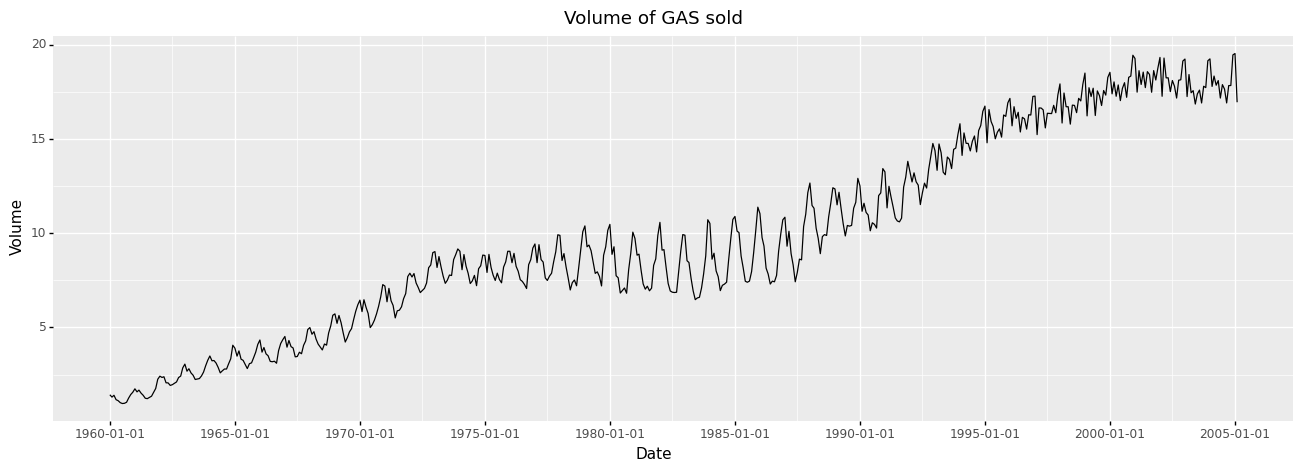

<ggplot: (8768109594908)>

In [19]:
# Problem 3.

canadian_gas_df = load_data("canadian_gas").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year,
    Month=lambda df: df.Date.dt.month
)

(ggplot(canadian_gas_df) +
    aes(x='Date', y='Volume') +
    geom_line() +
    ggtitle("Volume of GAS sold") +
    theme(figure_size=(16,5))
)

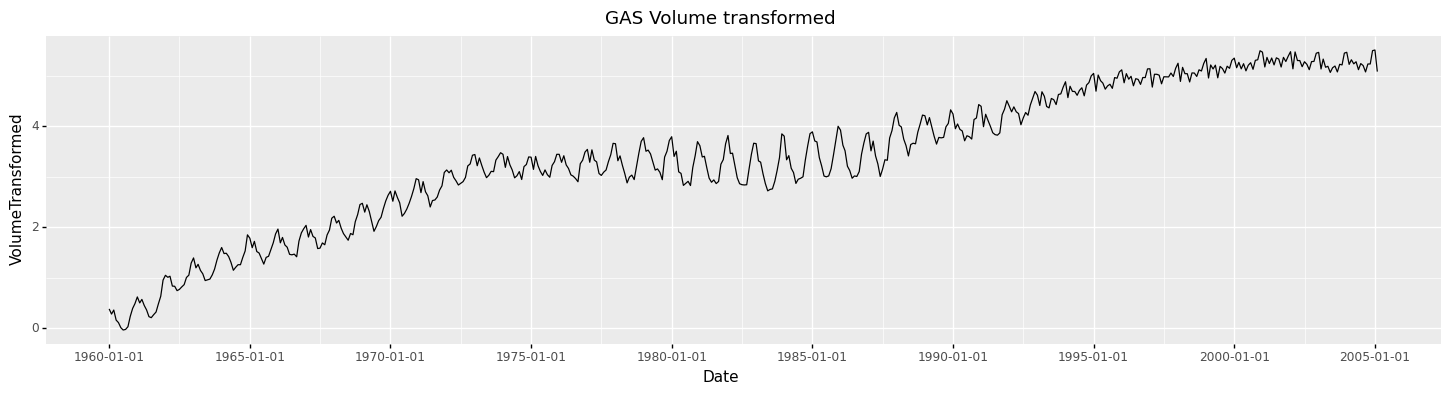

<ggplot: (8768111616672)>

In [22]:
(canadian_gas_df.assign(
    VolumeTransformed=lambda df: BoxCox().transform_boxcox(
        x=df.Volume, method='guerrero'
    )[0]
).pipe(ggplot) +
    aes(x='Date', y='VolumeTransformed') +
    geom_line() +
    ggtitle("GAS Volume transformed") +
    theme(figure_size=(18, 4))
)

Box-Cox transformatinos don't work since they are a power transformation and power transformations make monotonic transformations of the data. Power transformations rescale the power of the data, thus if there is increase\decrease in the variance it will be normalized. So, Power transformations won't be able to catch nonmonotonic increase\decrease.

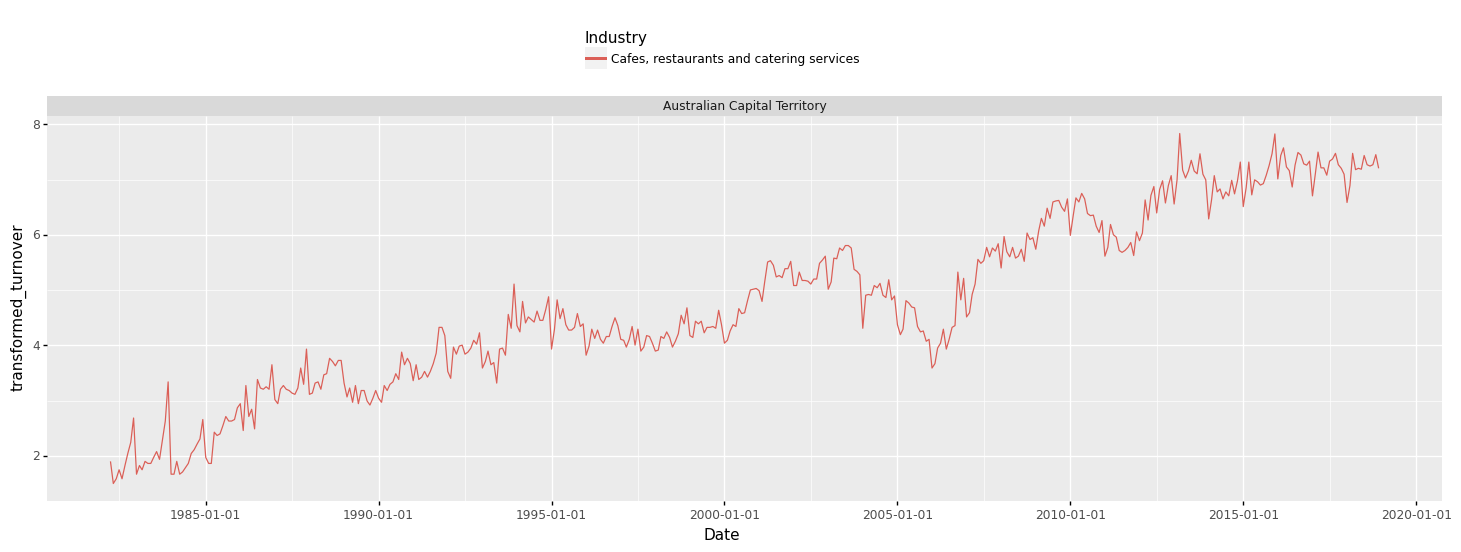

<ggplot: (323797134)>

In [ ]:
aus_retail_df = load_data("aus_retail").assign(
    Date=lambda df: pd.to_datetime(df.Month, format="%Y %b")
).assign(
    Year=lambda df: df.Date.dt.year, Month=lambda df: df.Date.dt.month
)

series = aus_retail_df[aus_retail_df["Series ID"] == 'A3349849A'].assign(
    transformed_turnover = lambda df: BoxCox().transform_boxcox(
        x=df.Turnover, method='guerrero'
    )[0]
)

(ggplot(series) +
    aes(x='Date', y='transformed_turnover', color='Industry') +
    geom_line() +
    facet_wrap("State") +
    theme(figure_size=(18, 5), legend_position="top")
)

4. What Box-Cox transformation would you select for your retail data (from Exercise 8 in Section 2.10)?


- **I don't understand that question, what from which?**
5. For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance. Tobacco from aus_production, Economy class passengers between Melbourne and Sydney from ansett, and Pedestrian counts at Southern Cross Station from pedestrian.

- **I don't understand that question, what does appropriate mean?**

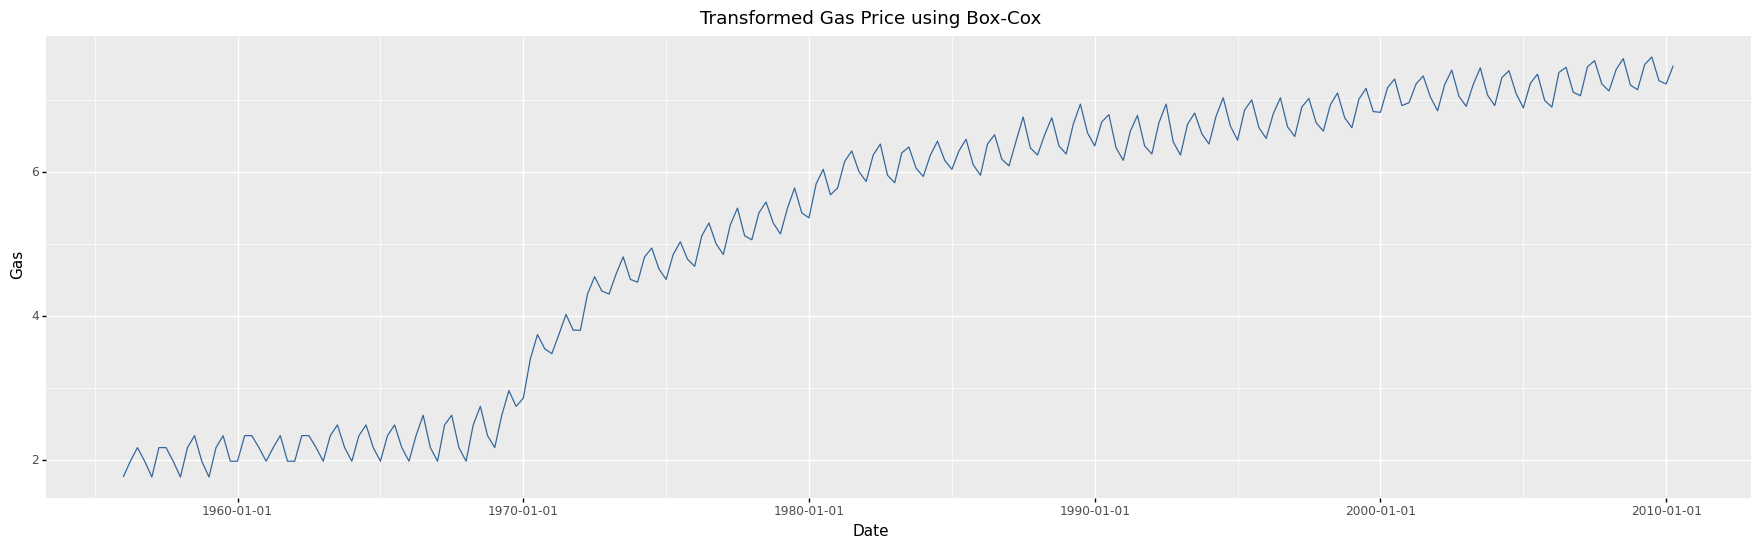

<ggplot: (8768111603207)>

In [33]:
aus_production_df = load_data("aus_production").assign(
    Date=lambda df: pd.to_datetime(df.Quarter.str.replace(" ", "-"))
)

# from statsmodels.base.transform import transform_boxcox
bc = BoxCox()

(aus_production_df.assign(
    GasTransformed=lambda df: bc.transform_boxcox(
        x=df.Gas, method='guerrero'
    )[0]
).pipe(ggplot) +
    aes(x='Date', y='GasTransformed') +
    geom_line(color="#336699") +
    ylab("Gas") +
    ggtitle("Transformed Gas Price using Box-Cox") +
    theme(figure_size=(22, 6))
)

Text(0.5, 1.0, 'Tobacco production in Australia')

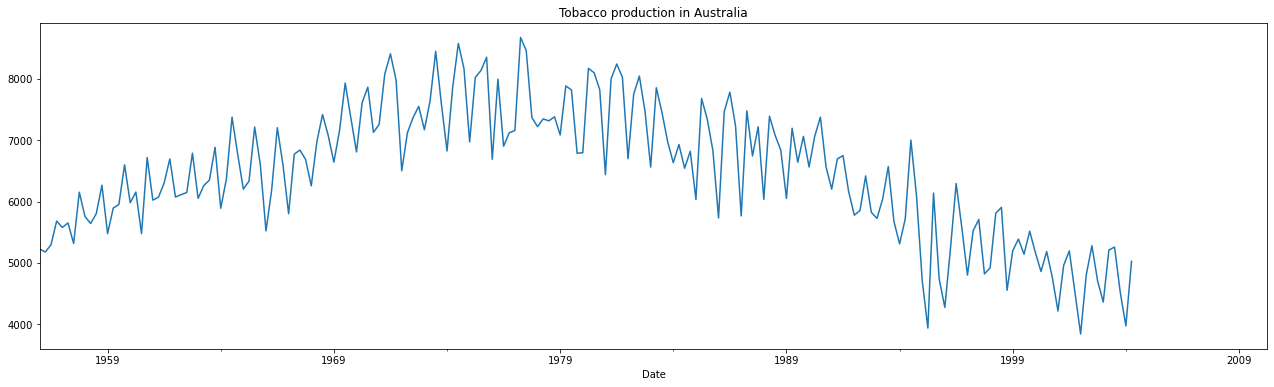

In [34]:
ax = aus_production_df.set_index('Date').Tobacco.plot(figsize=(22, 6))

ax.set_title("Tobacco production in Australia")

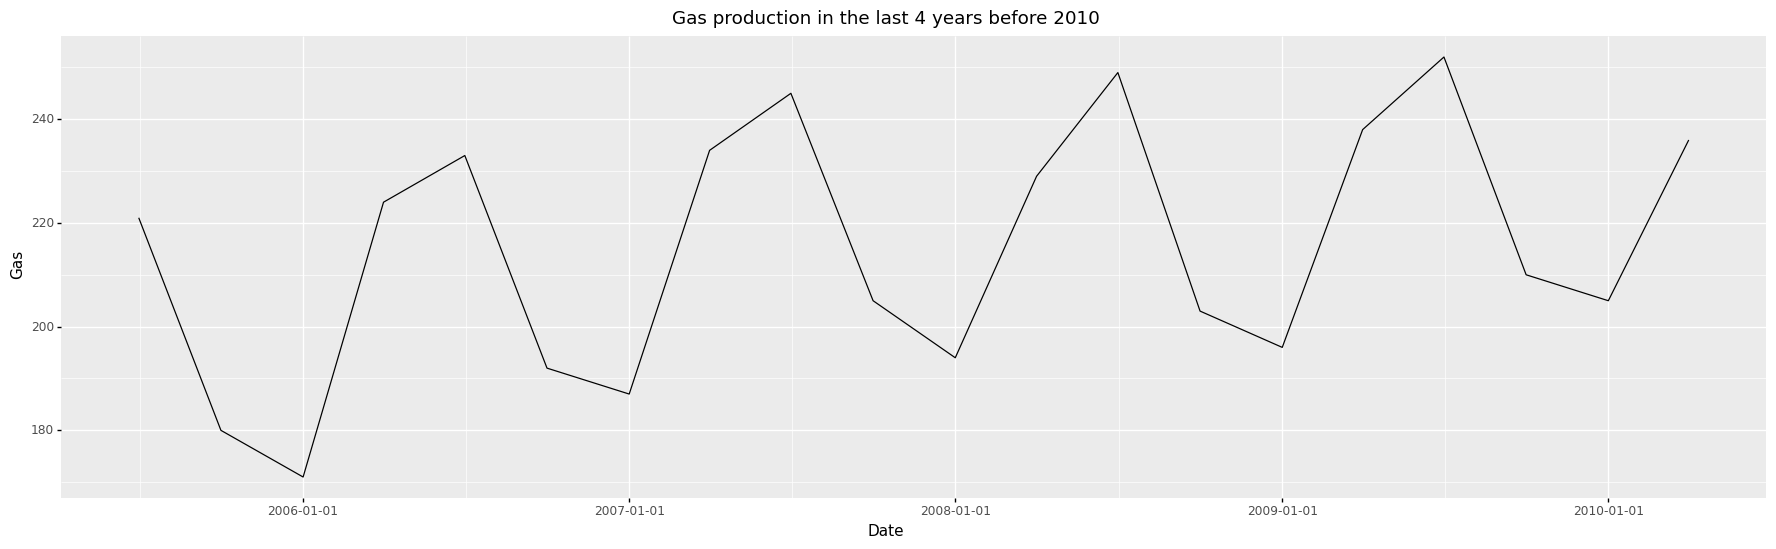

<ggplot: (8768115236109)>

In [35]:
# Problem 7 
last_aus_prod = aus_production_df.set_index('Date').tail(5*4)
(ggplot(last_aus_prod.reset_index()) +
    aes(x='Date', y='Gas') +
    geom_line() +
    ggtitle("Gas production in the last 4 years before 2010") +
    theme(figure_size=(22, 6)))

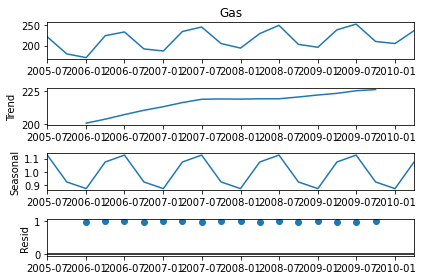

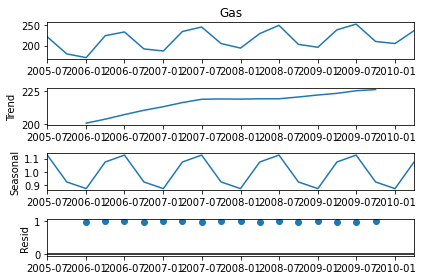

In [32]:
res = seasonal_decompose(x=last_aus_prod.Gas, model='multiplicative')
res.plot()
# Yes, they support it

### 2. Take the US GDP data ( `sm.datasets.longley.load_pandas()` from [Statsmodels](https://www.statsmodels.org/dev/tsa.html)).

- Use the [Hodrick-Prescott Filter](https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter). ([Statsmodels function](https://www.statsmodels.org/dev/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html)) to extract a trend and cyclic component from each series.

- You might want to transform these series first. Play around with the parameter values

- (you can use [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html)

- for an interactive notebook plot) and select the "best" ones.
- Why did you choose these values? What is the correspondence in cycles between different variables in the data?

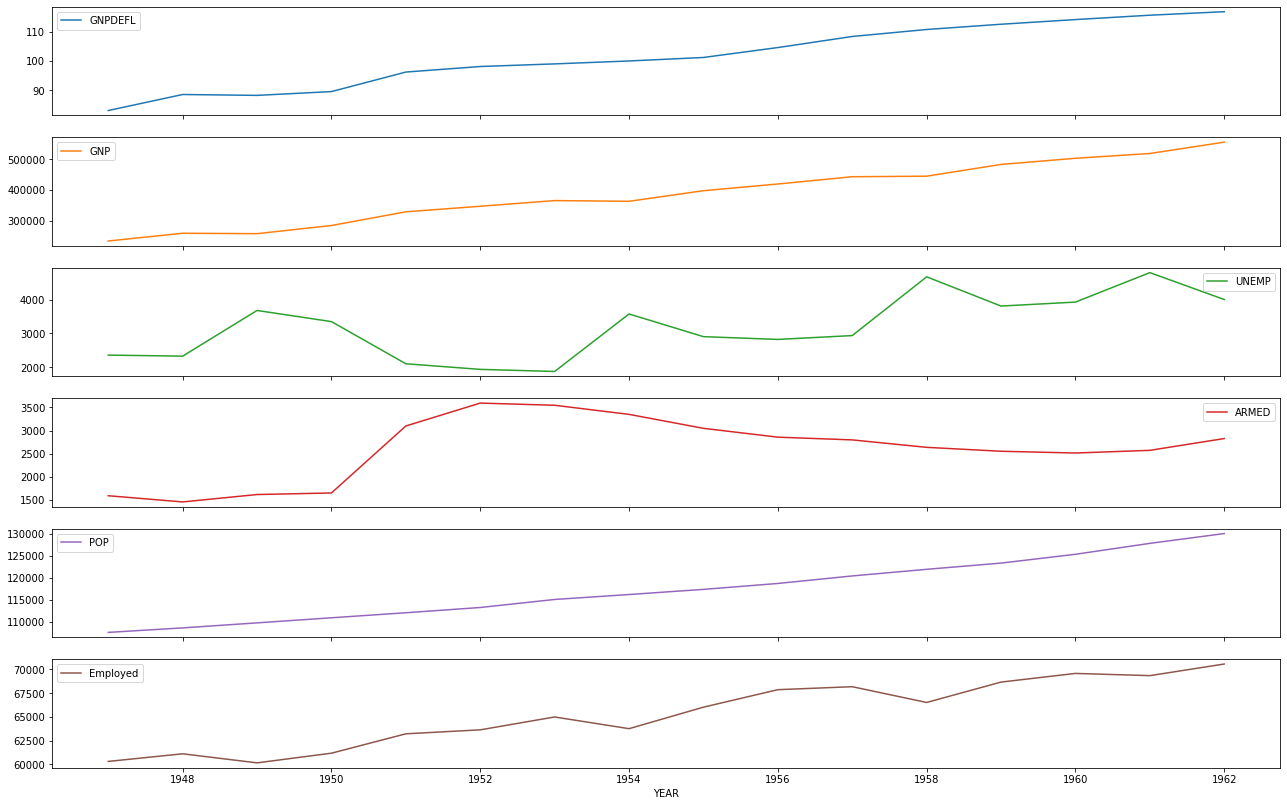

In [69]:
from statsmodels.datasets import longley

longley_data = longley.load_pandas()
y = longley.load_pandas().endog
X = longley.load_pandas().exog.assign(YEAR=lambda df: df.YEAR.astype(int))
X.head()

longley_df = X.assign(Employed=y).set_index("YEAR")
ax = longley_df.plot(figsize=(22, 14), subplots=True)

In [1]:
from ipywidgets import Dropdown, FloatSlider


dropdown_series_widget = Dropdown(
    options=longley_df.columns,
    value=longley_df.columns[0],
    description='Number:',
    disabled=False
)

lamb_param_slider_widget = FloatSlider(
    value=6.25,
    min=0,
    max=500,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

def plot_gas_consumption(column, lamb):
    cycle, trend = sm.tsa.filters.hpfilter(longley_df[column], lamb=lamb)

    pd.DataFrame({
        'cycle': cycle,
        'trend': trend,
        'actual': longley_df.Employed,
        'error': longley_df[column] - cycle - trend
    }).plot(figsize=(22, 8), subplots=True)

interact(
    plot_gas_consumption,
    column=dropdown_series_widget,
    lamb=lamb_param_slider_widget
)

NameError: name 'longley_df' is not defined

The recommended parameter for yearly data, really does give sort of a best approximation.